## Neural Network with more inputs

In [11]:
from sklearn.model_selection import train_test_split
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import sem
from scipy.stats import t

data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Temp\*.nc", parallel=True)
data_tmax = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Tmax\*.nc", parallel=True)
data_tmin = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Tmin\*.nc", parallel=True)
data_rain = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Rain\*.nc", parallel=True)
data_hurs = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Humidity\*.nc", parallel=True)
data_sun = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Sun\*.nc", parallel=True)
data_frost = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Frost\*.nc", parallel=True)
data_psl = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_psl\*.nc", parallel=True)
data_wind = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Wind\*.nc", parallel=True)

In [12]:
rain = np.array(data_rain['rainfall'])
winter_rain = rain[3::4]
summer_rain = rain[5::4]
spring_rain = rain[4::4]
autumn_rain = rain[6::4]
hurs = np.array(data_hurs['hurs'])
winter_hurs = hurs[3::4]
summer_hurs = hurs[5::4]
spring_hurs = hurs[4::4]
autumn_hurs = hurs[6::4]
temp = np.array(data_temp['tas'])
winter_temp = temp[3::4]
summer_temp = temp[5::4]
spring_temp = temp[4::4]
autumn_temp = temp[6::4]
temp_max = np.array(data_tmax['tasmax'])
winter_tmax = temp_max[3::4]
summer_tmax = temp_max[5::4]
spring_tmax = temp_max[4::4]
autumn_tmax = temp_max[6::4]
temp_min = np.array(data_tmin['tasmin'])
winter_tmin = temp_min[3::4]
summer_tmin = temp_min[5::4]
spring_tmin = temp_min[4::4]
autumn_tmin = temp_min[6::4]
sun = np.array(data_sun['sun'])
winter_sun = sun[3::4]
summer_sun = sun[5::4]
spring_sun = sun[4::4]
autumn_sun = sun[6::4]
frost = np.array(data_frost['groundfrost'])
winter_frost = frost[3::4]
summer_frost = frost[5::4]
spring_frost = frost[4::4]
autumn_frost = frost[6::4]
psl = np.array(data_psl['psl'])
winter_psl = psl[3::4]
summer_psl = psl[5::4]
spring_psl = psl[4::4]
autumn_psl = psl[6::4]
wind = np.array(data_wind['sfcWind'])
winter_wind = wind[3::4]
summer_wind = wind[5::4]
spring_wind = wind[4::4]
autumn_wind = wind[6::4]

In [13]:
temp_reduced = block_reduce(temp, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp))
tmax_reduced = block_reduce(temp_max, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp_max))
tmin_reduced = block_reduce(temp_min, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp_min))
rain_reduced = block_reduce(rain, block_size=(4, 1, 1), func=np.mean, cval=np.mean(rain))
hurs_reduced = block_reduce(hurs, block_size=(4, 1, 1), func=np.mean, cval=np.mean(hurs))
sun_reduced = block_reduce(sun, block_size=(4, 1, 1), func=np.mean, cval=np.mean(sun))
frost_reduced = block_reduce(frost, block_size=(4, 1, 1), func=np.mean, cval=np.mean(frost))
psl_reduced = block_reduce(psl, block_size=(4, 1, 1), func=np.mean, cval=np.mean(psl))
wind_reduced = block_reduce(wind, block_size=(4, 1, 1), func=np.mean, cval=np.mean(wind))

In [14]:
min_length = len(autumn_wind)
rain_reduced = rain_reduced[:min_length]
hurs_reduced = hurs_reduced[:min_length]
temp_reduced = temp_reduced[:min_length]
tmax_reduced = tmax_reduced[:min_length]
tmin_reduced = tmin_reduced[:min_length]
sun_reduced = sun_reduced[:min_length]
frost_reduced = frost_reduced[:min_length]
wind_reduced = wind_reduced[:min_length]
psl_reduced = psl_reduced[:min_length]
winter_rain = winter_rain[:min_length]
summer_rain = summer_rain[:min_length]
spring_rain = spring_rain[:min_length]
autumn_rain = autumn_rain[:min_length]
winter_hurs = winter_hurs[:min_length]
summer_hurs = summer_hurs[:min_length]
spring_hurs = spring_hurs[:min_length]
autumn_hurs = autumn_hurs[:min_length]
winter_temp = winter_temp[:min_length]
summer_temp = summer_temp[:min_length]
spring_temp = spring_temp[:min_length]
autumn_temp = autumn_temp[:min_length]
winter_tmax = winter_tmax[:min_length]
summer_tmax = summer_tmax[:min_length]
spring_tmax = spring_tmax[:min_length]
autumn_tmax = autumn_tmax[:min_length]
winter_tmin = winter_tmin[:min_length]
summer_tmin = summer_tmin[:min_length]
spring_tmin = spring_tmin[:min_length]
autumn_tmin = autumn_tmin[:min_length]
winter_sun = winter_sun[:min_length]
summer_sun = summer_sun[:min_length]
spring_sun = spring_sun[:min_length]
autumn_sun = autumn_sun[:min_length]
winter_frost = winter_frost[:min_length]
summer_frost = summer_frost[:min_length]
spring_frost = spring_frost[:min_length]
autumn_frost = autumn_frost[:min_length]
winter_psl = winter_psl[:min_length]
summer_psl = summer_psl[:min_length]
spring_psl = spring_psl[:min_length]
autumn_psl = autumn_psl[:min_length]
winter_wind = winter_wind[:min_length]
summer_wind = summer_wind[:min_length]
spring_wind = spring_wind[:min_length]
autumn_wind = autumn_wind[:min_length]

In [15]:
scaler = MinMaxScaler()

rain_reduced = scaler.fit_transform(rain_reduced.reshape(-1, 1)).flatten()
hurs_reduced = scaler.fit_transform(hurs_reduced.reshape(-1, 1)).flatten()
temp_reduced = scaler.fit_transform(temp_reduced.reshape(-1, 1)).flatten()
tmax_reduced = scaler.fit_transform(tmax_reduced.reshape(-1, 1)).flatten()
tmin_reduced = scaler.fit_transform(tmin_reduced.reshape(-1, 1)).flatten()
sun_reduced = scaler.fit_transform(sun_reduced.reshape(-1, 1)).flatten()
frost_reduced = scaler.fit_transform(frost_reduced.reshape(-1, 1)).flatten()
wind_reduced = scaler.fit_transform(wind_reduced.reshape(-1, 1)).flatten()
psl_reduced = scaler.fit_transform(psl_reduced.reshape(-1, 1)).flatten()
winter_rain = scaler.fit_transform(winter_rain.reshape(-1, 1)).flatten()
summer_rain = scaler.fit_transform(summer_rain.reshape(-1, 1)).flatten()
spring_rain = scaler.fit_transform(spring_rain.reshape(-1, 1)).flatten()
autumn_rain = scaler.fit_transform(autumn_rain.reshape(-1, 1)).flatten()
winter_hurs = scaler.fit_transform(winter_hurs.reshape(-1, 1)).flatten()
summer_hurs = scaler.fit_transform(summer_hurs.reshape(-1, 1)).flatten()
spring_hurs = scaler.fit_transform(spring_hurs.reshape(-1, 1)).flatten()
autumn_hurs = scaler.fit_transform(autumn_hurs.reshape(-1, 1)).flatten()
winter_temp = scaler.fit_transform(winter_temp.reshape(-1, 1)).flatten()
summer_temp = scaler.fit_transform(summer_temp.reshape(-1, 1)).flatten()
spring_temp = scaler.fit_transform(spring_temp.reshape(-1, 1)).flatten()
autumn_temp = scaler.fit_transform(autumn_temp.reshape(-1, 1)).flatten()
winter_tmax = scaler.fit_transform(winter_tmax.reshape(-1, 1)).flatten()
summer_tmax = scaler.fit_transform(summer_tmax.reshape(-1, 1)).flatten()
spring_tmax = scaler.fit_transform(spring_tmax.reshape(-1, 1)).flatten()
autumn_tmax = scaler.fit_transform(autumn_tmax.reshape(-1, 1)).flatten()
winter_tmin = scaler.fit_transform(winter_tmin.reshape(-1, 1)).flatten()
summer_tmin = scaler.fit_transform(summer_tmin.reshape(-1, 1)).flatten()
spring_tmin = scaler.fit_transform(spring_tmin.reshape(-1, 1)).flatten()
autumn_tmin = scaler.fit_transform(autumn_tmin.reshape(-1, 1)).flatten()
winter_sun = scaler.fit_transform(winter_sun.reshape(-1, 1)).flatten()
summer_sun = scaler.fit_transform(summer_sun.reshape(-1, 1)).flatten()
spring_sun = scaler.fit_transform(spring_sun.reshape(-1, 1)).flatten()
autumn_sun = scaler.fit_transform(autumn_sun.reshape(-1, 1)).flatten()
winter_frost = scaler.fit_transform(winter_frost.reshape(-1, 1)).flatten()
summer_frost = scaler.fit_transform(summer_frost.reshape(-1, 1)).flatten()
spring_frost = scaler.fit_transform(spring_frost.reshape(-1, 1)).flatten()
autumn_frost = scaler.fit_transform(autumn_frost.reshape(-1, 1)).flatten()
winter_psl = scaler.fit_transform(winter_psl.reshape(-1, 1)).flatten()
summer_psl = scaler.fit_transform(summer_psl.reshape(-1, 1)).flatten()
spring_psl = scaler.fit_transform(spring_psl.reshape(-1, 1)).flatten()
autumn_psl = scaler.fit_transform(autumn_psl.reshape(-1, 1)).flatten()
winter_wind = scaler.fit_transform(winter_wind.reshape(-1, 1)).flatten()
summer_wind = scaler.fit_transform(summer_wind.reshape(-1, 1)).flatten()
spring_wind = scaler.fit_transform(spring_wind.reshape(-1, 1)).flatten()
autumn_wind = scaler.fit_transform(autumn_wind.reshape(-1, 1)).flatten()

print(len(autumn_wind), len(temp_reduced), len(winter_rain), len(summer_sun))

486752 486752 486752 486752


In [16]:
num_years_temp, x, y = temp.shape

# Create an array of years to match the reshaped temperature arrays
years_expanded = np.repeat(np.arange(1970, 2023), x * y)
print(years_expanded.shape)
data_dict = {
    'Year': years_expanded,
    'Rain': rain_reduced,
    'Hurs': hurs_reduced,
    'Temperature': temp_reduced,
    'Tmax': tmax_reduced,
    'Tmin': tmin_reduced,
    'Sun': sun_reduced,
    'Frost': frost_reduced,
    'Wind': wind_reduced,
    'Psl': psl_reduced,
    'Winter Rain': winter_rain,
    'Summer Rain': summer_rain,
    'Spring Rain': spring_rain,
    'Autumn Rain': autumn_rain,
    'Winter Hurs': winter_hurs,
    'Summer Hurs': summer_hurs,
    'Spring Hurs': spring_hurs,
    'Autumn Hurs': autumn_hurs,
    'Winter Temp': winter_temp,
    'Summer Temp': summer_temp,
    'Spring Temp': spring_temp,
    'Autumn Temp': autumn_temp,
    'Winter Tmax': winter_tmax,
    'Summer Tmax': summer_tmax,
    'Spring Tmax': spring_tmax,
    'Autumn Tmax': autumn_tmax,
    'Winter Tmin': winter_tmin,
    'Summer Tmin': summer_tmin,
    'Spring Tmin': spring_tmin,
    'Autumn Tmin': autumn_tmin,
    'Winter Sun': winter_sun,
    'Summer Sun': summer_sun,
    'Spring Sun': spring_sun,
    'Autumn Sun': autumn_sun,
    'Winter Frost': winter_frost,
    'Summer Frost': summer_frost,
    'Spring Frost': spring_frost,
    'Autumn Frost': autumn_frost,
    'Winter Psl': winter_psl,
    'Summer Psl': summer_psl,
    'Spring Psl': spring_psl,
    'Autumn Psl': autumn_psl,
    'Winter Wind': winter_wind,
    'Summer Wind': summer_wind,
    'Spring Wind': spring_wind,
    'Autumn Wind': autumn_wind,
}


df = pd.DataFrame(data_dict)
df.set_index('Year', inplace=True)
df = df.sort_values(by='Year')
df.dropna(inplace=True)
df['Class'] = df.index.map(lambda year: 'pre_1990' if year < 1990 else 'post_1990')

(486752,)


In [17]:
X = df[['Rain', 'Hurs', 'Temperature', 'Tmax', 'Tmin',
    'Sun', 'Frost', 'Wind', 'Psl',
    'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
    'Winter Tmin', 'Summer Tmin', 'Spring Tmin', 'Autumn Tmin',
    'Winter Sun', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
    'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']].values
y = df['Class'].map(lambda x: 1 if x == 'post_1990' else 0).values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_val_tensor = torch.FloatTensor(X_val)
X_test_tensor = torch.FloatTensor(X_test)

y_train_tensor = torch.tensor(y_train)
y_val_tensor = torch.tensor(y_val)
y_test_tensor = torch.tensor(y_test)

In [19]:
import torch.nn as nn
import torch.optim as optim

class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.activation = nn.ReLU()
        self.layer2 = nn.Linear(128, 1)
        self.output_activation = nn.Sigmoid()

        # Initialize intermediate outputs as None
        self.intermediate_outputs = None

    def forward(self, x):
        x = self.layer1(x)
        intermediate1 = self.activation(x)  # Store the output of the first layer
        x = self.layer2(intermediate1)
        intermediate2 = self.output_activation(x)  # Store the final output

        # Store intermediate outputs in a tuple
        self.intermediate_outputs = (intermediate1, intermediate2)

        return intermediate2

# Instantiate the model
input_size = 45
model = NeuralNetwork(input_size)  

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [26]:
import matplotlib.pyplot as plt

# Training the model
num_epochs = 4000
train_losses = []  
val_losses = []   
train_accuracies = []  
val_accuracies = []    

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor.float())
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
   
    # Training accuracy 
    with torch.no_grad():
        train_preds = (outputs >= 0.5).float()
        train_accuracy = (train_preds == y_train_tensor.float()).float().mean().item()
        train_accuracies.append(train_accuracy)
    
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val_tensor).squeeze() # validating the model
        val_loss = criterion(val_outputs, y_val_tensor.float())

        # Validation accuracy
        val_preds = (val_outputs >= 0.5).float()
        val_accuracy = (val_preds == y_val_tensor.float()).float().mean().item()
        val_accuracies.append(val_accuracy)
        
epochs = range(1, len(train_losses) + 1)

val_predictions = (val_outputs >= 0.5).int() 
correct_predictions = (val_predictions == y_val_tensor.int()).sum().item()
total_samples = len(y_val_tensor)

In [61]:
from torchsummary import summary
import torch
import torch.nn as nn

model = NeuralNetwork(input_size=45) 

# Specify the device as a string
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

summary(model, input_size=(45,), device=device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]           5,888
              ReLU-2                  [-1, 128]               0
            Linear-3                    [-1, 1]             129
           Sigmoid-4                    [-1, 1]               0
Total params: 6,017
Trainable params: 6,017
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


Validation Loss: {0.0008892684709280729}
Final Training Accuracy: 1.0000
Final Validation Accuracy: 0.9996


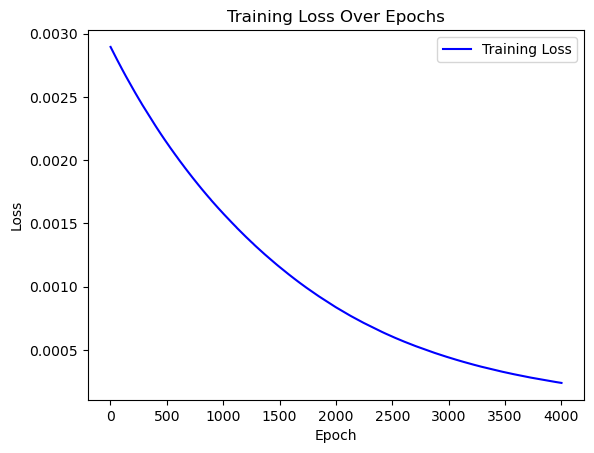

In [27]:
accuracy = correct_predictions / total_samples
print('Validation Loss:', {val_loss.item()})
final_train_accuracy = train_accuracies[-1]
final_val_accuracy = val_accuracies[-1]

print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

# Loss plot
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.show()

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze().numpy()

model.eval()
with torch.no_grad():
    _ = model(X_test_tensor)  # Forward pass to store intermediate outputs
    intermediate1, intermediate2 = model.intermediate_outputs

binary_predictions = (predictions > 0.5).astype(int)
    
accuracy = accuracy_score(y_test_tensor.numpy(), binary_predictions)
print(f'Accuracy: {accuracy:.3f}')

print("Classification Report:")
print(classification_report(y_test_tensor.numpy(), binary_predictions))

Accuracy: 1.000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5127
           1       1.00      1.00      1.00      8430

    accuracy                           1.00     13557
   macro avg       1.00      1.00      1.00     13557
weighted avg       1.00      1.00      1.00     13557



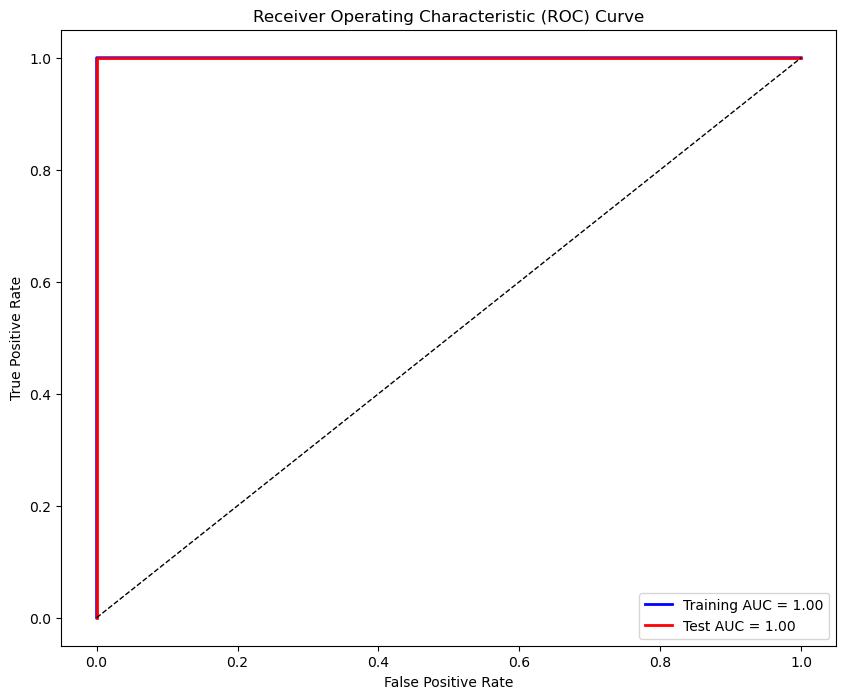

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model.eval()

# Get predicted probabilities for positive class on the test set
with torch.no_grad():
    test_predictions = model(X_test_tensor).squeeze().numpy()

# Get predicted probabilities for positive class on the training set
with torch.no_grad():
    train_predictions = model(X_train_tensor).squeeze().numpy()

# Calculate false positive rate, true positive rate, and thresholds for test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_tensor, test_predictions)

roc_auc_test = auc(fpr_test, tpr_test)

# Calculate false positive rate, true positive rate, and thresholds for training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_tensor, train_predictions)

roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training AUC = {roc_auc_train:.2f}')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

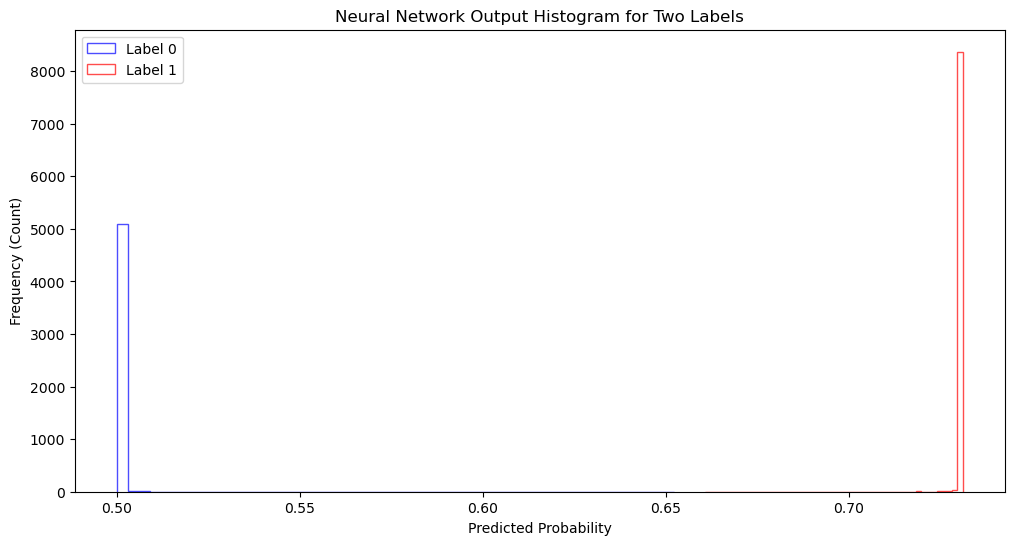

In [30]:
import matplotlib.pyplot as plt

model.eval()  
with torch.no_grad():
    outputs = model(X_test_tensor)
    probabilities = torch.sigmoid(outputs).squeeze().numpy()

y_test_prob_nn = probabilities

# Create a DataFrame with true labels and predicted probabilities
result_df_nn = pd.DataFrame({
    'True_Label': y_test_tensor.numpy(),
    'Predicted_Probability': y_test_prob_nn
})

# Specify the two labels for which you want to create histograms
label_1 = 0
label_2 = 1

# Filter the DataFrame for each label
data_label_1_nn = result_df_nn[result_df_nn['True_Label'] == label_1]['Predicted_Probability']
data_label_2_nn = result_df_nn[result_df_nn['True_Label'] == label_2]['Predicted_Probability']

# Create histograms for each label using matplotlib without density normalization
plt.figure(figsize=(12, 6))

# Histogram for label_1
plt.hist(data_label_1_nn, bins=50, alpha=0.7, label=f'Label {label_1}', color='blue', histtype='step')

# Histogram for label_2
plt.hist(data_label_2_nn, bins=50, alpha=0.7, label=f'Label {label_2}', color='red', histtype='step')

plt.title('Neural Network Output Histogram for Two Labels')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency (Count)')
plt.legend()
plt.show()


The mean values of the classes are 0.5002338 0.7309889
The standard deviations of the classes are 0.003943475428968668 0.00120884261559695


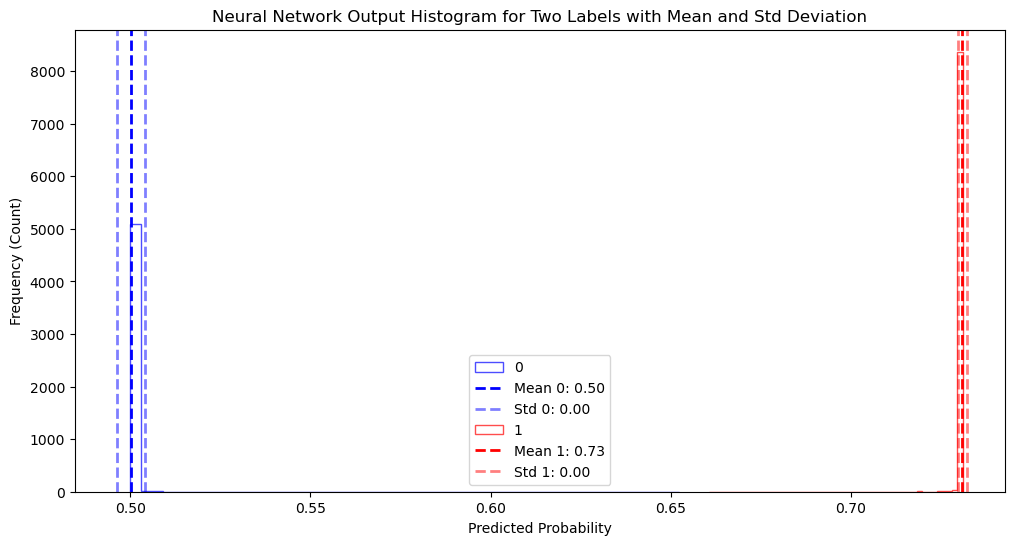

In [31]:
label_1 = 0
label_2 = 1

# Filter the DataFrame for each label
data_label_1 = result_df_nn[result_df_nn['True_Label'] == label_1]['Predicted_Probability']
data_label_2 = result_df_nn[result_df_nn['True_Label'] == label_2]['Predicted_Probability']

# Calculate mean and standard deviation values
mean_label_1 = np.mean(data_label_1)
std_label_1 = np.std(data_label_1)

mean_label_2 = np.mean(data_label_2)
std_label_2 = np.std(data_label_2)

print('The mean values of the classes are', mean_label_1, mean_label_2)
print('The standard deviations of the classes are', std_label_1, std_label_2)

# Create histograms for each label using matplotlib without density normalization
plt.figure(figsize=(12, 6))

# Histogram for label_1
plt.hist(data_label_1, bins=50, alpha=0.7, label=f'{label_1}', color='blue', histtype='step')
plt.axvline(mean_label_1, color='blue', linestyle='dashed', linewidth=2, label=f'Mean {label_1}: {mean_label_1:.2f}')
plt.axvline(mean_label_1 + std_label_1, color='blue', linestyle='dashed', linewidth=2, label=f'Std {label_1}: {std_label_1:.2f}', alpha=0.5)
plt.axvline(mean_label_1 - std_label_1, color='blue', linestyle='dashed', linewidth=2, alpha=0.5)

# Histogram for label_2
plt.hist(data_label_2, bins=50, alpha=0.7, label=f'{label_2}', color='red', histtype='step')
plt.axvline(mean_label_2, color='red', linestyle='dashed', linewidth=2, label=f'Mean {label_2}: {mean_label_2:.2f}')
plt.axvline(mean_label_2 + std_label_2, color='red', linestyle='dashed', linewidth=2, label=f'Std {label_2}: {std_label_2:.2f}', alpha=0.5)
plt.axvline(mean_label_2 - std_label_2, color='red', linestyle='dashed', linewidth=2, alpha=0.5)

plt.title('Neural Network Output Histogram for Two Labels with Mean and Std Deviation')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency (Count)')
plt.legend()
plt.show()

In [32]:
z = (mean_label_1 - mean_label_2) / np.sqrt((std_label_1 **2) + (std_label_2 **2))

print('The Z-score for the Neural Network is', z)

The Z-score for the Neural Network is -55.946096256111694


In [33]:
data_shape = X_test_tensor.shape

from sklearn.metrics import confusion_matrix

# Set the model to evaluation mode
model.eval()

# Make predictions on the test set
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze().numpy()

# Convert predictions to binary
binary_predictions = (predictions > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test_tensor.numpy(), binary_predictions)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[5124    3]
 [   0 8430]]


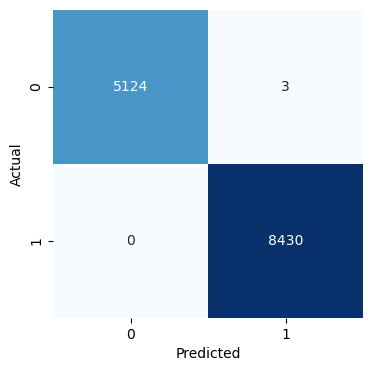

In [34]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

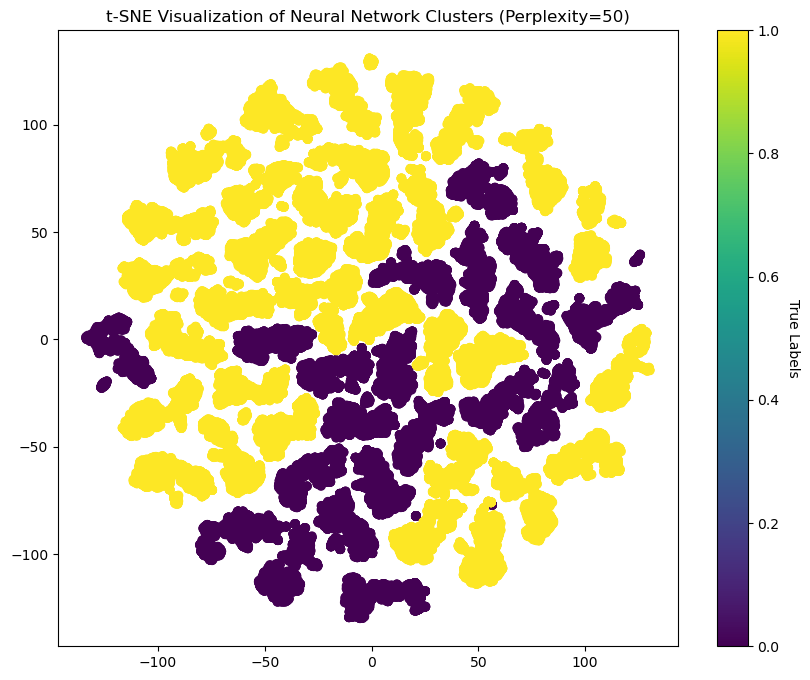

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch

model.eval()

# Convert X to a PyTorch tensor
X_tensor = torch.FloatTensor(X)

with torch.no_grad():
    _ = model(X_tensor)  # Forward pass to store intermediate outputs
    intermediate1, intermediate2 = model.intermediate_outputs

# Set the perplexity for t-SNE
perplexity_value = 50  
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_result = tsne.fit_transform(intermediate1.numpy())

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y, cmap='viridis')

cbar = plt.colorbar(scatter)
cbar.set_label('True Labels', rotation=270, labelpad=15)

plt.title(f't-SNE Visualization of Neural Network Clusters (Perplexity={perplexity_value})')
plt.show()

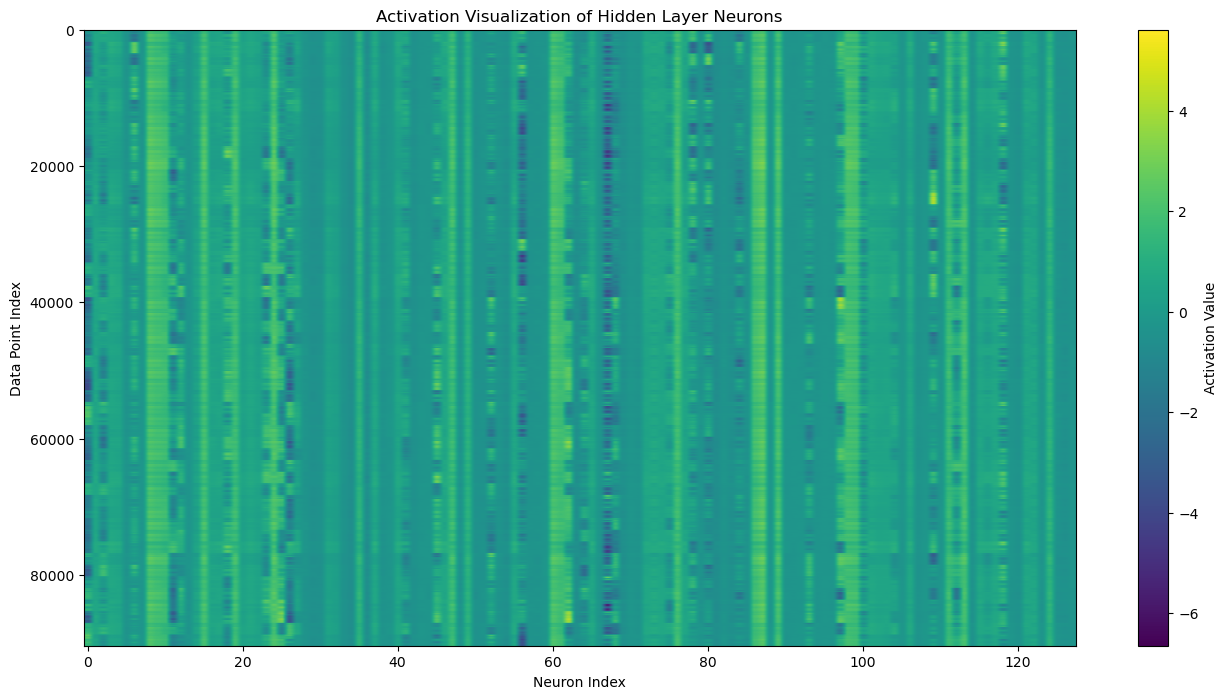

In [36]:
model.eval()  # Set the model to evaluation mode
X_tensor = torch.from_numpy(X).float()  # Convert X to a PyTorch tensor

with torch.no_grad():
    # Get activations from the hidden layer
    activations = model.layer1(X_tensor)

# Plot activation values for each neuron
plt.figure(figsize=(16, 8))
plt.imshow(activations.numpy(), cmap='viridis', aspect='auto')
plt.colorbar(label='Activation Value')
plt.title('Activation Visualization of Hidden Layer Neurons')
plt.xlabel('Neuron Index')
plt.ylabel('Data Point Index')
plt.show()

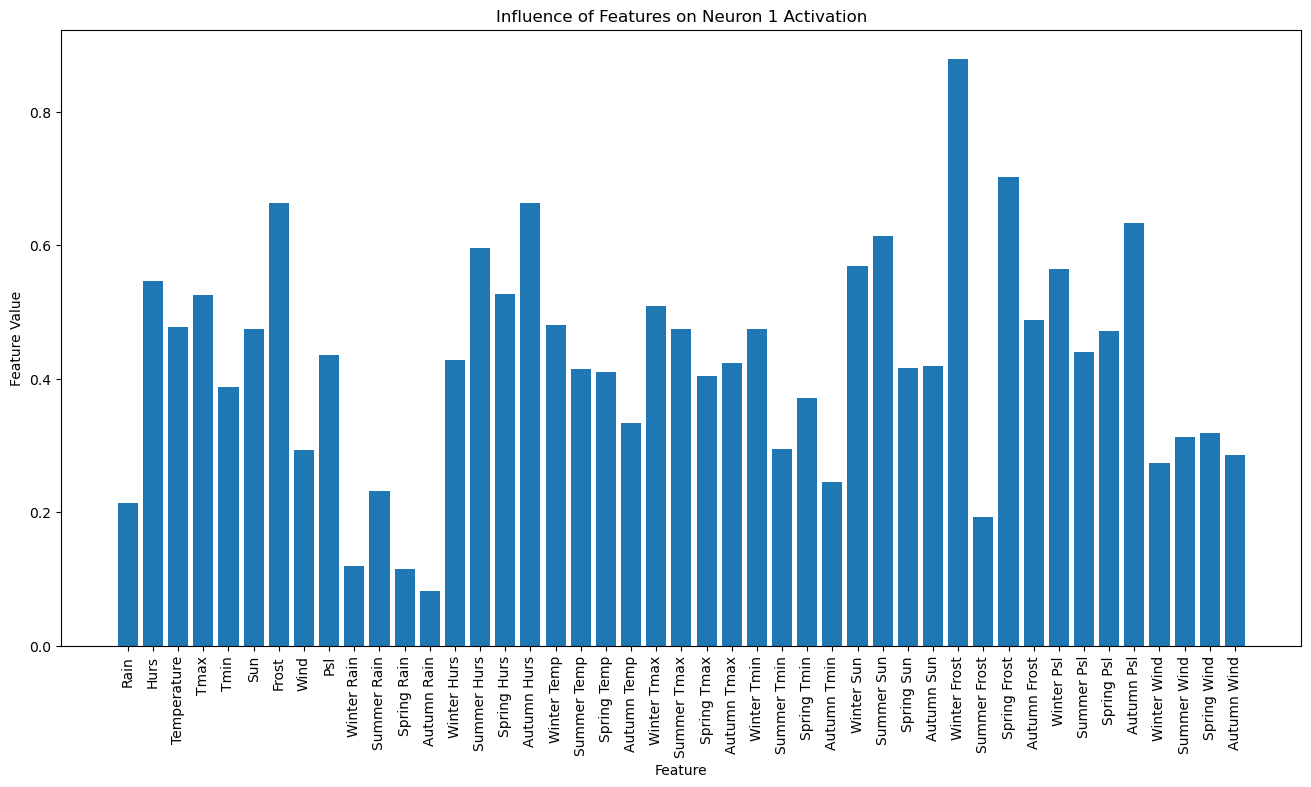

In [37]:
from torchvision import transforms

data_point_index = 0  

# Set the model to evaluation mode
model.eval()

# Forward pass to get the intermediate outputs
with torch.no_grad():
    intermediate_outputs = model(X_tensor)

# Choose a specific neuron index in the hidden layer
neuron_index = 0

# Extract the activation values for the chosen neuron
activation_values = intermediate_outputs[0][0].item()

# Display the corresponding data point
data_point = X_tensor[data_point_index].numpy()

feature_names = ['Rain', 'Hurs', 'Temperature', 'Tmax', 'Tmin',
                 'Sun', 'Frost', 'Wind', 'Psl',
                 'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
                 'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
                 'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
                 'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
                 'Winter Tmin', 'Summer Tmin', 'Spring Tmin', 'Autumn Tmin',
                 'Winter Sun', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
                 'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
                 'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
                 'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind'] 

plt.figure(figsize=(16, 8))
plt.bar(range(len(data_point)), data_point)
plt.xlabel('Feature')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.ylabel('Feature Value')
plt.title(f'Influence of Features on Neuron 1 Activation')
plt.show()

C:\Users\iarla\miniconda3\envs\jupyter-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


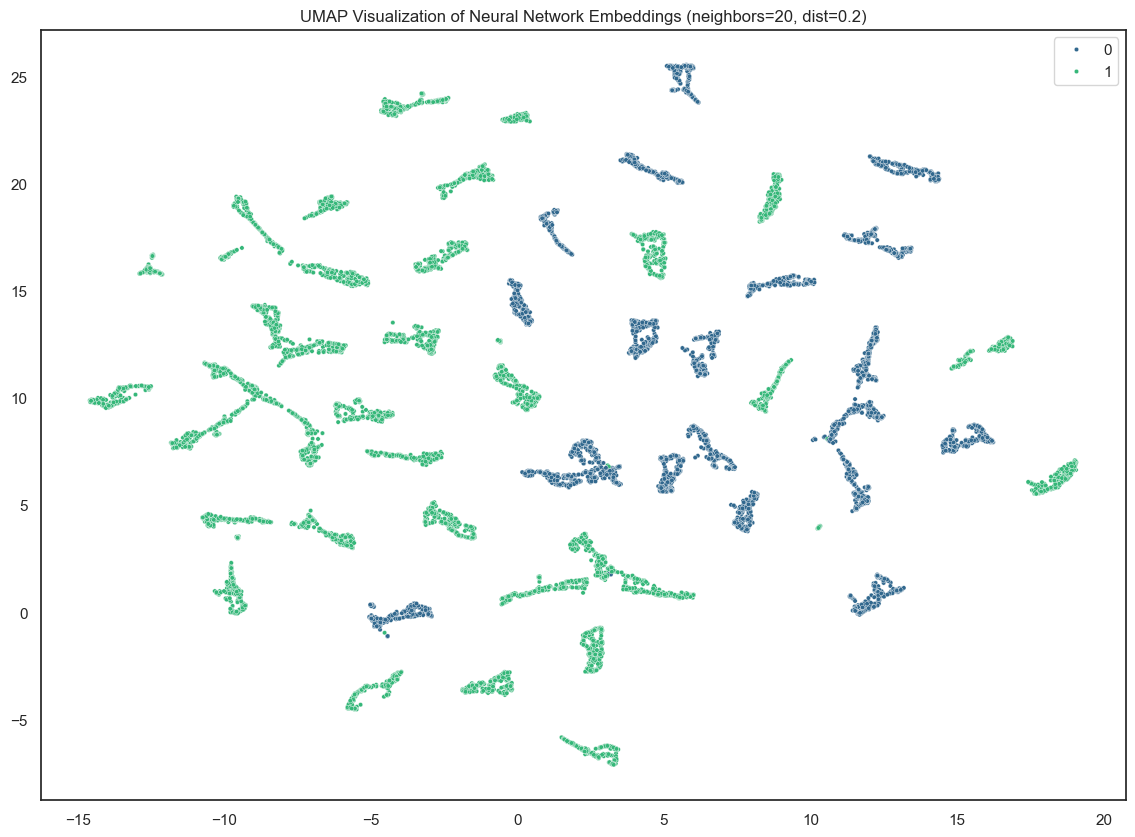

In [38]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model.eval()
with torch.no_grad():
    _ = model(X_test_tensor)  # Forward pass to store intermediate outputs
    intermediate1, intermediate2 = model.intermediate_outputs 

# Get the embeddings from the first hidden layer (intermediate1)
embeddings = intermediate1.numpy()

# Apply UMAP
umap_embedding = umap.UMAP(n_neighbors=20, min_dist=0.2, metric='euclidean').fit_transform(embeddings)

# Assuming 'labels' is your true labels
labels = y_test_tensor.numpy()

# Check lengths
if len(umap_embedding) != len(labels):
    raise ValueError("Lengths of umap_embedding and labels must be the same.")

# Create a scatter plot
sns.set(style='white', context='notebook', rc={'figure.figsize': (14, 10)})
sns.scatterplot(x=umap_embedding[:, 0], y=umap_embedding[:, 1], hue=labels, palette='viridis', s=10)
plt.title('UMAP Visualization of Neural Network Embeddings (neighbors=20, dist=0.2)')
plt.show()


## Neural Network with less features

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from skimage.measure import block_reduce
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import sem
from scipy.stats import t

# Load your data
data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)
data_tmax = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmax\*.nc", parallel=True)
data_tmin = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmin\*.nc", parallel=True)
data_rain = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)
data_hurs = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Humidity\*.nc", parallel=True)
data_sun = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Sun\*.nc", parallel=True)
data_frost = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Frost\*.nc", parallel=True)
data_psl = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_psl\*.nc", parallel=True)
data_wind = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Wind\*.nc", parallel=True)

In [3]:
rain = np.array(data_rain['rainfall'])
hurs = np.array(data_hurs['hurs'])
temp = np.array(data_temp['tas'])
temp_max = np.array(data_tmax['tasmax'])
temp_min = np.array(data_tmin['tasmin'])
sun = np.array(data_sun['sun'])
frost = np.array(data_frost['groundfrost'])
psl = np.array(data_psl['psl'])
wind = np.array(data_wind['sfcWind'])

In [4]:
temp_reduced = block_reduce(temp, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp))
tmax_reduced = block_reduce(temp_max, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp_max))
tmin_reduced = block_reduce(temp_min, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp_min))
rain_reduced = block_reduce(rain, block_size=(12, 1, 1), func=np.mean, cval=np.mean(rain))
hurs_reduced = block_reduce(hurs, block_size=(12, 1, 1), func=np.mean, cval=np.mean(hurs))
sun_reduced = block_reduce(sun, block_size=(12, 1, 1), func=np.mean, cval=np.mean(sun))
frost_reduced = block_reduce(frost, block_size=(12, 1, 1), func=np.mean, cval=np.mean(frost))
psl_reduced = block_reduce(psl, block_size=(12, 1, 1), func=np.mean, cval=np.mean(psl))
wind_reduced = block_reduce(wind, block_size=(12, 1, 1), func=np.mean, cval=np.mean(wind))

min_length = len(wind_reduced)
rain = rain_reduced[:min_length]
hurs = hurs_reduced[:min_length]
temp_reduced = temp_reduced[:min_length]
tmax_reduced = tmax_reduced[:min_length]
tmin_reduced = tmin_reduced[:min_length]
sun = sun_reduced[:min_length]
frost = frost_reduced[:min_length]
wind = wind_reduced[:min_length]
psl = psl_reduced[:min_length]

scaler = MinMaxScaler()

rain = scaler.fit_transform(rain.reshape(-1, 1)).flatten()
hurs = scaler.fit_transform(hurs.reshape(-1, 1)).flatten()
temp_annual_mean = scaler.fit_transform(temp_reduced.reshape(-1, 1)).flatten()
tmax_annual_mean = scaler.fit_transform(tmax_reduced.reshape(-1, 1)).flatten()
tmin_annual_mean = scaler.fit_transform(tmin_reduced.reshape(-1, 1)).flatten()
sun = scaler.fit_transform(sun.reshape(-1, 1)).flatten()
frost = scaler.fit_transform(frost.reshape(-1, 1)).flatten()
psl = scaler.fit_transform(psl.reshape(-1, 1)).flatten()
wind = scaler.fit_transform(wind.reshape(-1, 1)).flatten()

In [5]:
# Assuming temp, temp_max, and temp_min have shape (num_years, x, y)
num_years_temp, x, y = temp.shape

# Create an array of years to match the reshaped temperature arrays
years_expanded = np.repeat(np.arange(1969, 2023), x * y)

data_dict = {
    'Year': years_expanded,
    'Temperature': temp_annual_mean,
    'Maximum Temperature': tmax_annual_mean,
    'Minimum Temperature': tmin_annual_mean,
    'Rainfall': rain,
    'Humidity': hurs,
    'Ground Frost': frost,
    'Sunshine': sun,
    'Mean Sea Level Pressure': psl,
    'Wind Speed': wind
}

df = pd.DataFrame(data_dict)
df.set_index('Year', inplace=True)
df = df.sort_values(by='Year')
df.dropna(inplace=True)
df['Class'] = df.index.map(lambda year: 'pre_1990' if year < 1990 else 'post_1990')


In [18]:
X = df[['Temperature', 'Maximum Temperature', 'Minimum Temperature', 'Rainfall', 'Humidity', 'Ground Frost', 'Sunshine', 'Mean Sea Level Pressure', 'Wind Speed']].values
y = df['Class'].map(lambda x: 1 if x == 'post_1990' else 0).values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_val_tensor = torch.FloatTensor(X_val)
X_test_tensor = torch.FloatTensor(X_test)

y_train_tensor = torch.tensor(y_train)
y_val_tensor = torch.tensor(y_val)
y_test_tensor = torch.tensor(y_test)

In [20]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.activation = nn.ReLU()
        self.layer2 = nn.Linear(64, 1)
        self.output_activation = nn.Sigmoid()

        # Initialize intermediate outputs as None
        self.intermediate_outputs = None

    def forward(self, x):
        x = self.layer1(x)
        intermediate1 = self.activation(x)  # Store the output of the first layer
        x = self.layer2(intermediate1)
        intermediate2 = self.output_activation(x)  # Store the final output

        # Store intermediate outputs in a tuple
        self.intermediate_outputs = (intermediate1, intermediate2)

        return intermediate2

In [21]:
# Instantiate the model
input_size = X_train_tensor.shape[1]
model = NeuralNetwork(input_size)

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [26]:
import matplotlib.pyplot as plt

# Training the model
num_epochs = 3000
train_losses = []  
val_losses = []   
train_accuracies = []  
val_accuracies = []    

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor.float())
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
   
    # Training accuracy 
    with torch.no_grad():
        train_preds = (outputs >= 0.5).float()
        train_accuracy = (train_preds == y_train_tensor.float()).float().mean().item()
        train_accuracies.append(train_accuracy)
    
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val_tensor).squeeze() # validating the model
        val_loss = criterion(val_outputs, y_val_tensor.float())

        # Validation accuracy
        val_preds = (val_outputs >= 0.5).float()
        val_accuracy = (val_preds == y_val_tensor.float()).float().mean().item()
        val_accuracies.append(val_accuracy)
        
epochs = range(1, len(train_losses) + 1)

val_predictions = (val_outputs >= 0.5).int() 
correct_predictions = (val_predictions == y_val_tensor.int()).sum().item()
total_samples = len(y_val_tensor)

Validation Loss: {0.3848849833011627}
Final Training Accuracy: 0.8266
Final Validation Accuracy: 0.8220


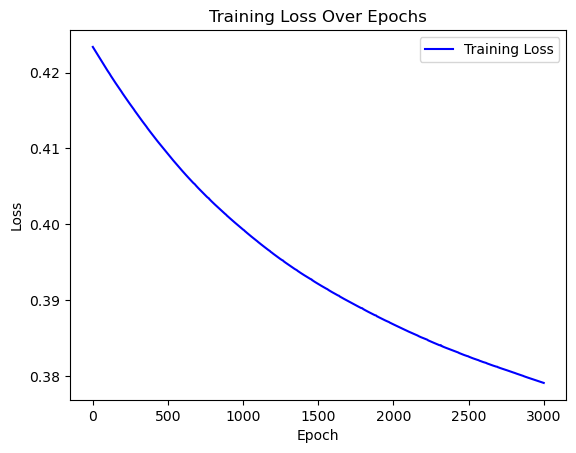

In [27]:
accuracy = correct_predictions / total_samples
print('Validation Loss:', {val_loss.item()})
final_train_accuracy = train_accuracies[-1]
final_val_accuracy = val_accuracies[-1]

print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

# Loss plot
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze().numpy()

model.eval()
with torch.no_grad():
    _ = model(X_test_tensor)  # Forward pass to store intermediate outputs
    intermediate1, intermediate2 = model.intermediate_outputs 

binary_predictions = (predictions > 0.5).astype(int)
    
accuracy = accuracy_score(y_test_tensor.numpy(), binary_predictions)
print(f'Accuracy: {accuracy:.3f}')

print("Classification Report:")
print(classification_report(y_test_tensor.numpy(), binary_predictions))

Accuracy: 0.831
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      5303
           1       0.85      0.88      0.86      8492

    accuracy                           0.83     13795
   macro avg       0.82      0.82      0.82     13795
weighted avg       0.83      0.83      0.83     13795



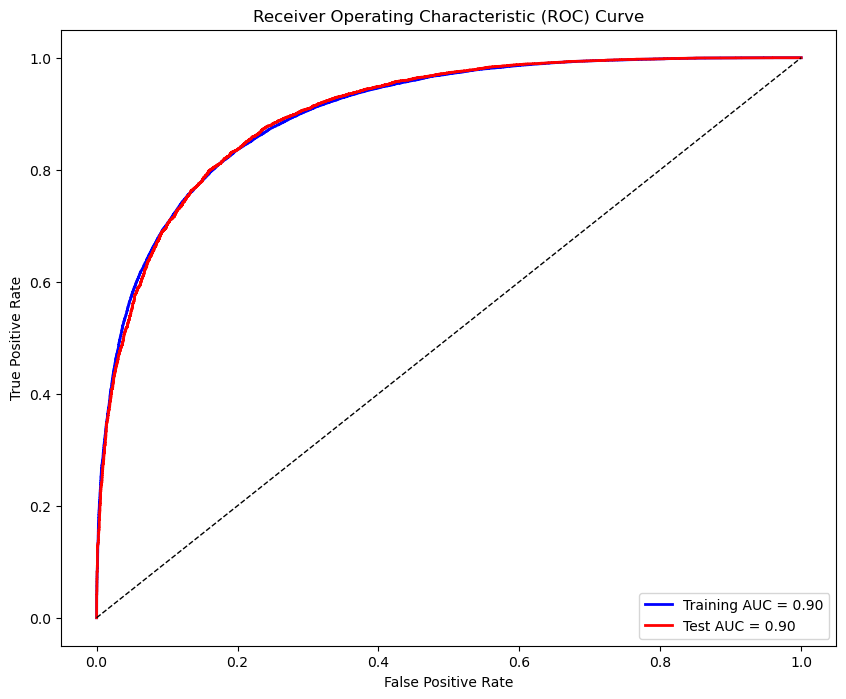

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model.eval()

# Get predicted probabilities for positive class on the test set
with torch.no_grad():
    test_predictions = model(X_test_tensor).squeeze().numpy()

# Get predicted probabilities for positive class on the training set
with torch.no_grad():
    train_predictions = model(X_train_tensor).squeeze().numpy()

# Calculate false positive rate, true positive rate, and thresholds for test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_tensor, test_predictions)

roc_auc_test = auc(fpr_test, tpr_test)

# Calculate false positive rate, true positive rate, and thresholds for training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_tensor, train_predictions)

roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training AUC = {roc_auc_train:.2f}')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

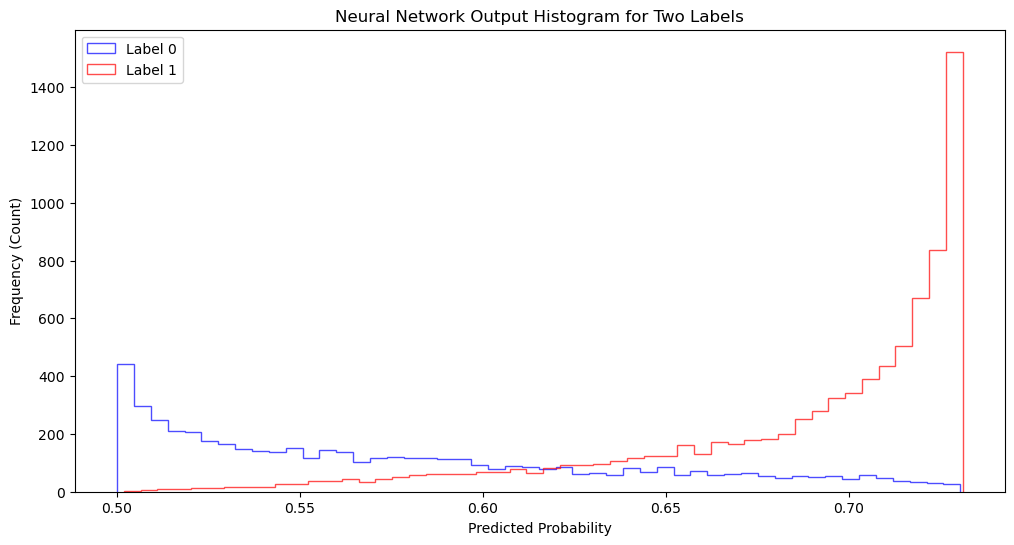

In [30]:
import matplotlib.pyplot as plt

model.eval()  
with torch.no_grad():
    outputs = model(X_test_tensor)
    probabilities = torch.sigmoid(outputs).squeeze().numpy()

y_test_prob_nn = probabilities

# Create a DataFrame with true labels and predicted probabilities
result_df_nn = pd.DataFrame({
    'True_Label': y_test_tensor.numpy(),
    'Predicted_Probability': y_test_prob_nn
})

# Specify the two labels for which you want to create histograms
label_1 = 0
label_2 = 1

# Filter the DataFrame for each label
data_label_1_nn = result_df_nn[result_df_nn['True_Label'] == label_1]['Predicted_Probability']
data_label_2_nn = result_df_nn[result_df_nn['True_Label'] == label_2]['Predicted_Probability']

# Create histograms for each label using matplotlib without density normalization
plt.figure(figsize=(12, 6))

# Histogram for label_1
plt.hist(data_label_1_nn, bins=50, alpha=0.7, label=f'Label {label_1}', color='blue', histtype='step')

# Histogram for label_2
plt.hist(data_label_2_nn, bins=50, alpha=0.7, label=f'Label {label_2}', color='red', histtype='step')

plt.title('Neural Network Output Histogram for Two Labels')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency (Count)')
plt.legend()
plt.show()


The mean values of the classes are 0.5769894 0.6868507
The standard deviations of the classes are 0.06304920464754105 0.047629356384277344


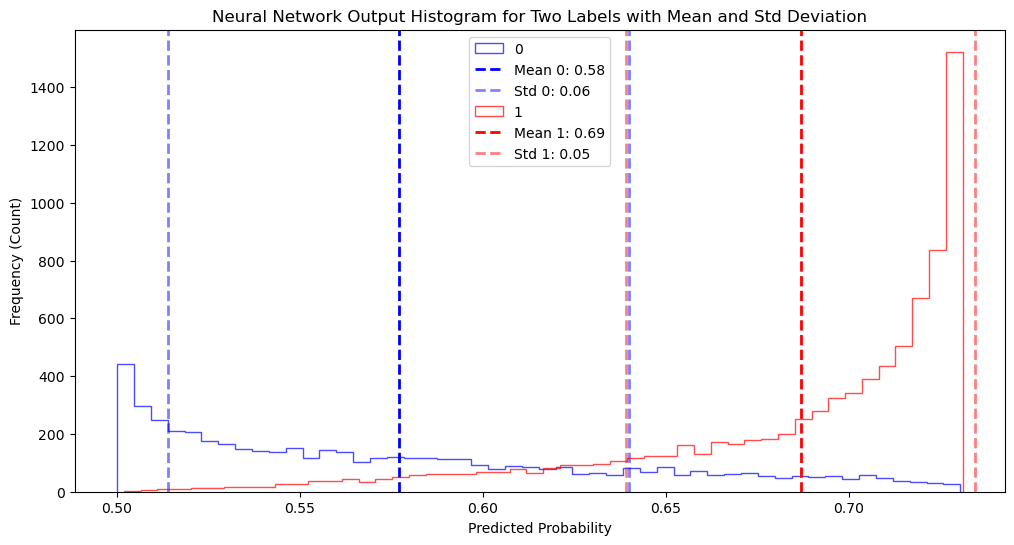

In [31]:
label_1 = 0
label_2 = 1

# Filter the DataFrame for each label
data_label_1 = result_df_nn[result_df_nn['True_Label'] == label_1]['Predicted_Probability']
data_label_2 = result_df_nn[result_df_nn['True_Label'] == label_2]['Predicted_Probability']

# Calculate mean and standard deviation values
mean_label_1 = np.mean(data_label_1)
std_label_1 = np.std(data_label_1)

mean_label_2 = np.mean(data_label_2)
std_label_2 = np.std(data_label_2)

print('The mean values of the classes are', mean_label_1, mean_label_2)
print('The standard deviations of the classes are', std_label_1, std_label_2)

# Create histograms for each label using matplotlib without density normalization
plt.figure(figsize=(12, 6))

# Histogram for label_1
plt.hist(data_label_1, bins=50, alpha=0.7, label=f'{label_1}', color='blue', histtype='step')
plt.axvline(mean_label_1, color='blue', linestyle='dashed', linewidth=2, label=f'Mean {label_1}: {mean_label_1:.2f}')
plt.axvline(mean_label_1 + std_label_1, color='blue', linestyle='dashed', linewidth=2, label=f'Std {label_1}: {std_label_1:.2f}', alpha=0.5)
plt.axvline(mean_label_1 - std_label_1, color='blue', linestyle='dashed', linewidth=2, alpha=0.5)

# Histogram for label_2
plt.hist(data_label_2, bins=50, alpha=0.7, label=f'{label_2}', color='red', histtype='step')
plt.axvline(mean_label_2, color='red', linestyle='dashed', linewidth=2, label=f'Mean {label_2}: {mean_label_2:.2f}')
plt.axvline(mean_label_2 + std_label_2, color='red', linestyle='dashed', linewidth=2, label=f'Std {label_2}: {std_label_2:.2f}', alpha=0.5)
plt.axvline(mean_label_2 - std_label_2, color='red', linestyle='dashed', linewidth=2, alpha=0.5)

plt.title('Neural Network Output Histogram for Two Labels with Mean and Std Deviation')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency (Count)')
plt.legend()
plt.show()

In [32]:
z = (mean_label_1 - mean_label_2) / np.sqrt((std_label_1 **2) + (std_label_2 **2))

print('The Z-score for the Neural Network is', z)

The Z-score for the Neural Network is -1.3903423971551865


In [33]:
from captum.attr import IntegratedGradients

ig = IntegratedGradients(model)

# Choose a specific instance from the test set
input_instance = X_test_tensor[0]
input_instance = input_instance.view(1, -1)

# Compute feature attributions
attributions, _ = ig.attribute(input_instance, target=0, return_convergence_delta=True)

print("Feature Attributions:", attributions)

C:\Users\iarla\miniconda3\envs\jupyter-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Feature Attributions: tensor([[ 0.9779, -0.4341, -0.5461,  0.1046, -0.3123, -0.2807, -0.0841, -0.1312,
         -0.0733]], dtype=torch.float64)


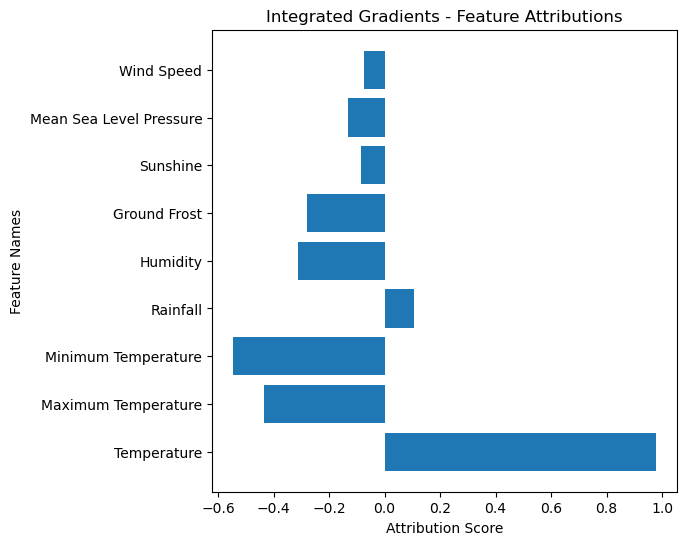

In [35]:
feature_names = ['Temperature', 'Maximum Temperature', 'Minimum Temperature', 'Rainfall', 'Humidity', 'Ground Frost', 'Sunshine', 'Mean Sea Level Pressure', 'Wind Speed']

# Convert the tensor to a numpy array
attributions_np = attributions.numpy()

# Create a bar plot
plt.figure(figsize=(6, 6))
plt.barh(feature_names, attributions_np[0])
plt.title('Integrated Gradients - Feature Attributions')
plt.xlabel('Attribution Score')
plt.ylabel('Feature Names')
plt.show()

Confusion Matrix:
[[3989 1314]
 [1021 7471]]


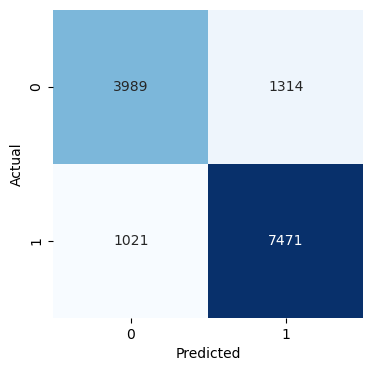

In [37]:
data_shape = X_test_tensor.shape

from sklearn.metrics import confusion_matrix

# Set the model to evaluation mode
model.eval()

# Make predictions on the test set
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze().numpy()

# Convert predictions to binary
binary_predictions = (predictions > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test_tensor.numpy(), binary_predictions)

print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

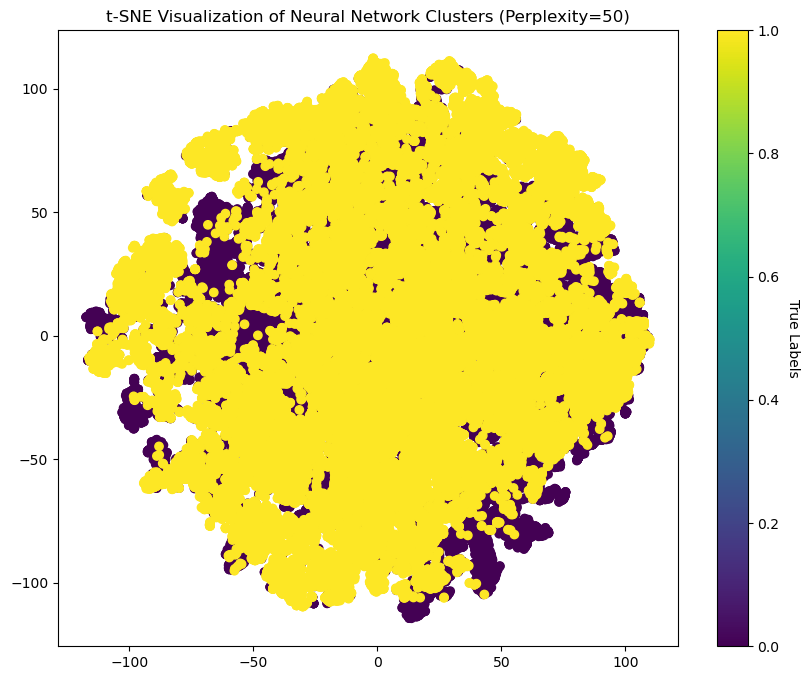

In [41]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch

model.eval()

# Convert X to a PyTorch tensor
X_tensor = torch.FloatTensor(X)

with torch.no_grad():
    _ = model(X_tensor)  # Forward pass to store intermediate outputs
    intermediate1, intermediate2 = model.intermediate_outputs

# Set the perplexity for t-SNE
perplexity_value = 50  
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_result = tsne.fit_transform(intermediate1.numpy())

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y, cmap='viridis')

cbar = plt.colorbar(scatter)
cbar.set_label('True Labels', rotation=270, labelpad=15)

plt.title(f't-SNE Visualization of Neural Network Clusters (Perplexity={perplexity_value})')
plt.show()

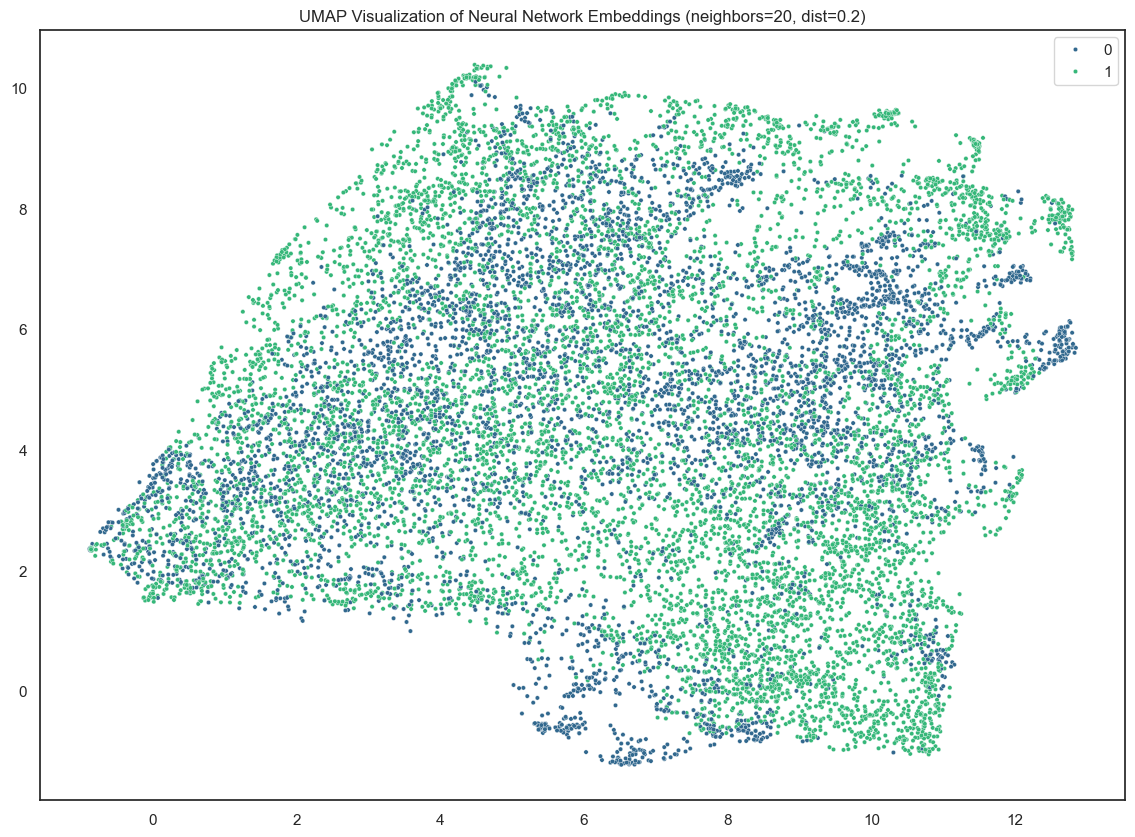

In [42]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model.eval()
with torch.no_grad():
    _ = model(X_test_tensor)  # Forward pass to store intermediate outputs
    intermediate1, intermediate2 = model.intermediate_outputs 

# Get the embeddings from the first hidden layer (intermediate1)
embeddings = intermediate1.numpy()

# Apply UMAP
umap_embedding = umap.UMAP(n_neighbors=20, min_dist=0.2, metric='euclidean').fit_transform(embeddings)

# Assuming 'labels' is your true labels
labels = y_test_tensor.numpy()

# Check lengths
if len(umap_embedding) != len(labels):
    raise ValueError("Lengths of umap_embedding and labels must be the same.")

# Create a scatter plot
sns.set(style='white', context='notebook', rc={'figure.figsize': (14, 10)})
sns.scatterplot(x=umap_embedding[:, 0], y=umap_embedding[:, 1], hue=labels, palette='viridis', s=10)
plt.title('UMAP Visualization of Neural Network Embeddings (neighbors=20, dist=0.2)')
plt.show()